Unit 7, Lecture 3
====

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, March 2nd 2017

In [5]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi
import scipy
import scipy.stats

plt.style.use('seaborn-whitegrid')

Sampling from Distributions
----

For many of the examples, I'll be creating samples from probability distributions. We won't cover this in our class, but if you can specify a probability distribution then you can generate samples from it. For example, let's say we have a Bernoulli distribution with a probability of success of 0.2. We can generate data that follows that distributions:

In [8]:
scipy.stats.bernoulli.rvs(size=10, p=0.2)

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

I won't have you create code to accomplish this process, so you can rely on `scipy.stats` to generate the data. It is done via the `rvs` command. An important thing to remember about these data is that it is *random*. If you run the code again, you'll get different results. Even if $p = 0.8$, you could get all `0`s. This is the same as if you had your own coin and flipped it. Creating randomness in a computer is a fascinating topic, but we'll just make use of it without trying to understand. 

Histogramming
---

To understand the data that comes from sampling, a common technique is histogramming. Histogramming is the process of tabulating and then plotting the table. Let's try it with the Bernoulli example. I'll count how many samples I had in different *bins*. Bins should encapsulate possible values. For example, I could make a bin between -0.01 and 0.01, which will catch all the 0s. 

In [19]:
#generate data
data = scipy.stats.bernoulli.rvs(size=10, p=0.2)

#histogram (tabulate) it into three bins
hist, bin_edges = np.histogram(data, bins=[-0.01, 0.01, 0.99, 1.01])

for i in range(len(hist)):
    print('There were {} samples between {} and {}'.format(hist[i], bin_edges[i], bin_edges[i + 1]))

There were 7 samples between -0.01 and 0.01
There were 0 samples between 0.01 and 0.99
There were 3 samples between 0.99 and 1.01


Our first attempt at bins is sort of clumsy. Let's try making the bins equal sized and only two of them:

In [20]:
#histogram (tabulate) it into two bins
hist, bin_edges = np.histogram(data, bins=[-0.5, 0.5, 1.5])

for i in range(len(hist)):
    print('There were {} samples between {} and {}'.format(hist[i], bin_edges[i], bin_edges[i + 1]))

There were 7 samples between -0.5 and 0.5
There were 3 samples between 0.5 and 1.5


This is much better! Let's now just report the center of the bin instead.

In [25]:
#calculate average of neighbor bins
print(bin_edges)
print(bin_edges[1:])
print(bin_edges[:-1])

bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
print(bin_centers)

[-0.5  0.5  1.5]
[ 0.5  1.5]
[-0.5  0.5]
[ 0.  1.]


In [26]:
for i in range(len(hist)):
    print('There were {} samples at {}'.format(hist[i], bin_centers[i]))

There were 7 samples at 0.0
There were 3 samples at 1.0


Finally, we can plot the table

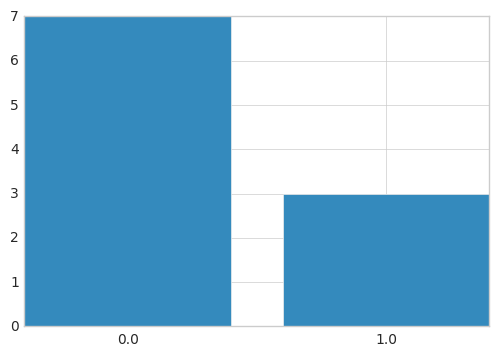

In [31]:
plt.bar(bin_centers, hist, tick_label=bin_centers, align='center')
plt.show()

This entire process is automated into the `plt.hist` command

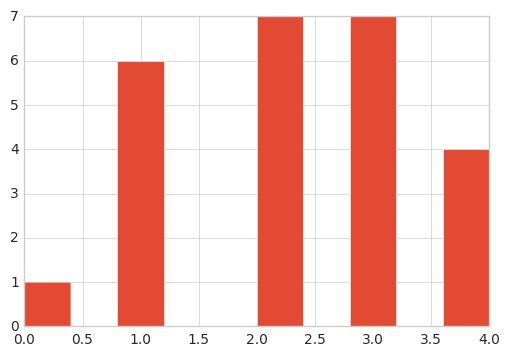

In [38]:
data = scipy.stats.binom.rvs(size=25, p=0.2, n=11)
plt.hist(data)
plt.show()

As you can see, it does an OK job but you often have to help it by specifing the bins:

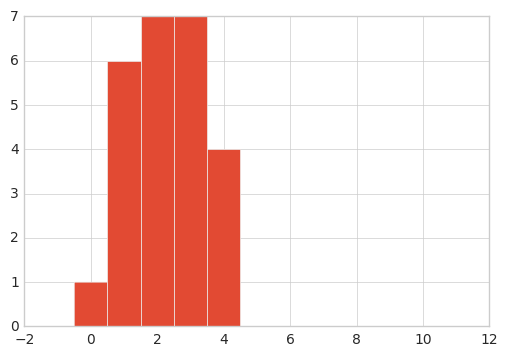

In [39]:
plt.hist(data, bins=np.arange(-0.5,11.5,1))
plt.show()

Now why do we see no examples of $n=10$ ?

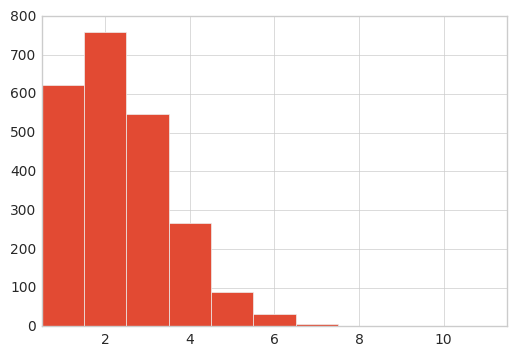

In [43]:
data = scipy.stats.binom.rvs(size=2500, p=0.2, n=11)
plt.hist(data, bins=np.arange(-0.5,11.5,1))
plt.xlim(0.5, 11.5)
plt.show()

Sampling Random Variables
-----

With this new capability, let's try to understand some random variables. Recall that random variables are functions of samples. For example, we could take the sample from the binomial distribution and take the square:

$$
Y = n \times n
$$

where $n$ is a sample from the binomial. Instead of analyzing it mathematically, we can just look at the samples

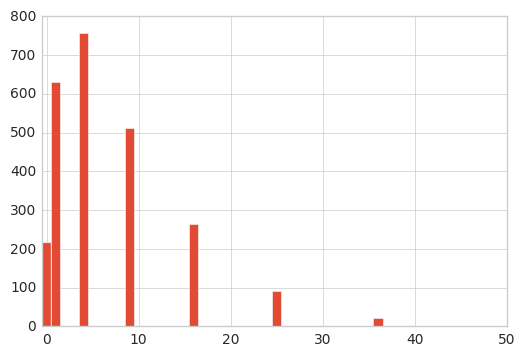

In [51]:
data = scipy.stats.binom.rvs(size=2500, p=0.2, n=11)
rv = data * data
plt.hist(rv, bins=np.arange(-0.5,11 * 11  + 0.5,1))
plt.xlim(-0.5, 50)
plt.show()

Now that we've learned how to generate data, let's generate some to use in understanding our new statistic measures

Covariance
---

Let's say I have T, U which are two independent normally distributed random variables. What do thes two constructed random variables look like:

$$ X = T$$

$$ Y = X + U$$

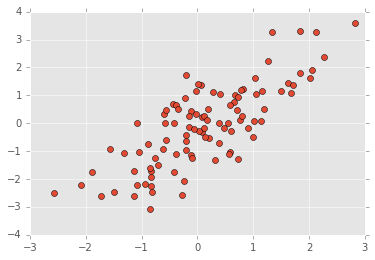

In [6]:
x = scipy.stats.norm.rvs(size=100)
y = x + scipy.stats.norm.rvs(size=100)

plt.plot(x,y, 'o')
plt.show()

As you might expect, there is a visible correlation between the points, but there is still noise. Let's look at the covrariance of the two

In [7]:
np.cov(x,y, ddof=1)

array([[ 1.02941139,  1.14626187],
       [ 1.14626187,  2.09867535]])

This is called a **covariance matrix**:

$$\left[\begin{array}{lr}
\sigma_{xx} & \sigma_{xy}\\
\sigma_{yx} & \sigma_{yy}\\
\end{array}\right]$$

As expected, there is a covariance between $X$ and $Y$. The `ddof` is set to 1, meaning that the divosor for sample covariance is $N - 1$. Remember that $N$ is the number of *pairs* of $x$ and $y$ values. 

Now we will examine a few other random variables and/or combinations. Try to think about what the covariance should be

In [9]:
x = scipy.stats.norm.rvs(size=100)
y = -x + scipy.stats.norm.rvs(size=100)

print(np.cov(x,y,ddof=1))

[[ 1.08804416 -1.17369841]
 [-1.17369841  2.24786948]]


In [10]:
x = scipy.stats.norm.rvs(size=100)
y = -3 * x + scipy.stats.norm.rvs(size=100)

print(np.cov(x,y,ddof=1))

[[ 0.93433811 -2.79248589]
 [-2.79248589  9.11905964]]


In [14]:
x = scipy.stats.norm.rvs(size=100, scale=3)
y = 25 * x + scipy.stats.norm.rvs(size=100, scale=2)

print(np.cov(x,y,ddof=1))

[[    8.51580389   212.50078477]
 [  212.50078477  5305.68222338]]


In [15]:
x = scipy.stats.norm.rvs(size=100)
y = scipy.stats.norm.rvs(size=100)

In [16]:
print(np.cov(x,y,ddof=1))

[[ 0.84524639  0.20298981]
 [ 0.20298981  1.00839456]]


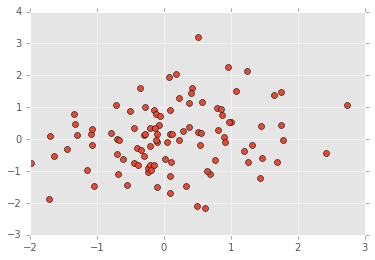

In [17]:
plt.plot(x,y, 'o')
plt.show()

In [18]:
x = scipy.stats.norm.rvs(size=100)
y = 3 * x + scipy.stats.norm.rvs(size=100)

print(np.corrcoef(x,y,ddof=1))

[[ 1.          0.93859106]
 [ 0.93859106  1.        ]]


In [19]:
x = scipy.stats.norm.rvs(size=100, scale=4)
y = -30 * x + scipy.stats.norm.rvs(size=100, scale=8)

print(np.corrcoef(x,y,ddof=1))

[[ 1.        -0.9983598]
 [-0.9983598  1.       ]]


In [20]:
x = scipy.stats.norm.rvs(size=100, scale=4)
y = 0.1 * x + scipy.stats.norm.rvs(size=100, scale=8)

print(np.corrcoef(x,y,ddof=1))

[[ 1.          0.06906414]
 [ 0.06906414  1.        ]]


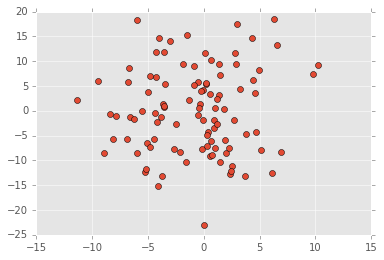

In [21]:
plt.plot(x,y, 'o')
plt.show()

Sample Correlation
====

Since the covariance includes the correlation between variables and the variance of the two variables, sample correlation tries to remove the variacne so we can view only correlation.

$$r_{xy} = \frac{\sigma_{xy}}{\sigma_x \sigma_y}$$

Similar to the covariance, there is something called the **correlation matrix** or **the normalized covariance matrix**.

In [22]:
x = scipy.stats.norm.rvs(size=100)
y = 3 * x + scipy.stats.norm.rvs(size=100)

print(np.corrcoef(x,y,ddof=1))

[[ 1.          0.94652421]
 [ 0.94652421  1.        ]]


In [23]:
x = scipy.stats.norm.rvs(size=100, scale=4)
y = -30 * x + scipy.stats.norm.rvs(size=100, scale=8)

print(np.corrcoef(x,y,ddof=1))

[[ 1.         -0.99736955]
 [-0.99736955  1.        ]]


In [24]:
x = scipy.stats.norm.rvs(size=100, scale=4)
y = 0.1 * x + scipy.stats.norm.rvs(size=100, scale=8)

print(np.corrcoef(x,y,ddof=1))

[[ 1.          0.20521724]
 [ 0.20521724  1.        ]]


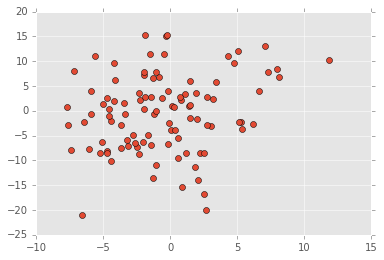

In [25]:
plt.plot(x,y, 'o')
plt.show()

Caveats of Correlation
====

In [26]:
x = scipy.stats.norm.rvs(size=100, scale=4)
y = x ** 2

In [27]:
print(np.corrcoef(x,y,ddof=1))

[[ 1.          0.15567552]
 [ 0.15567552  1.        ]]


In [28]:
x = scipy.stats.norm.rvs(size=100, scale=4)
y = np.cos(x)

In [29]:
print(np.corrcoef(x,y,ddof=1))

[[ 1.        -0.0115813]
 [-0.0115813  1.       ]]


In [30]:
x = scipy.stats.norm.rvs(size=100, scale=4)
y = 100 * x + 3

In [31]:
print(np.corrcoef(x,y,ddof=1))

[[ 1.  1.]
 [ 1.  1.]]
